In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:


def expectation_step(X, pi, mu, cov):
    n, d = X.shape
    K = len(pi)
    resp = np.zeros((n, K))

    for k in range(K):
        resp[:, k] = pi[k] * multivariate_normal.pdf(X, mean=mu[k], cov=cov[k])

    # Normalize the responsibilities
    resp_sum = np.sum(resp, axis=1) 
    for k in range(K):
        resp[:, k] /= resp_sum

    return resp

def maximization_step(X, resp):
    n, d = X.shape
    K = resp.shape[1]

    # Update pi
    pi = np.sum(resp, axis=0) / n

    # Update mu
    mu = np.zeros((K, d))
    for k in range(K):
        mu[k] = np.sum(resp[:, k].reshape(-1, 1) * X, axis=0) / np.sum(resp[:, k])

    # Update covariance
    cov = np.zeros((K, d, d))
    for k in range(K):
        diff = X - mu[k]
        cov[k] = np.dot(resp[:, k] * diff.T, diff) / np.sum(resp[:, k])

    return pi, mu, cov

def EM(X, K, max_iter=100):
    n, d = X.shape

    # Initialize the parameters
    pi = np.ones(K) / K
    mu = np.random.randn(K, d)
    cov = np.array([np.eye(d) for _ in range(K)])

    # Run EM algorithm
    for i in range(max_iter):
        resp = expectation_step(X, pi, mu, cov)
        pi, mu, cov = maximization_step(X, resp)

    return pi, mu, cov

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = fetch_california_housing(as_frame=True)
data=data.frame
data.isna().sum() 

pca = PCA(n_components=2)
data_red=pca.fit_transform(data)
scalar=StandardScaler()
data_ren=scalar.fit_transform(data_red)

df = pd.DataFrame(data_ren)

In [4]:
def predict_clusters(data, pi, mu, sigma):
    posterior_probs = np.zeros((data.shape[0], pi.shape[0]))
    for k in range(pi.shape[0]):
        posterior_probs[:, k] = pi[k] * multivariate_normal.pdf(data, mean=mu[k], cov=sigma[k])

    # assign each data point to the cluster with the highest posterior probability
    cluster_labels = np.argmax(posterior_probs, axis=1)

    return cluster_labels


In [5]:
from sklearn.metrics import silhouette_score
score=[]

In [6]:
k_val = [2,3,4]

In [7]:
k=2

print('\n when k is :',k)
pi,mu,var=EM(df, k, max_iter=300)
print('mu values are:',mu)
print('var is :',var)
print('pi is ',pi)
prediction_k2=predict_clusters(df,pi,mu,var)
sc=silhouette_score(df,prediction_k2)
print('silhietter score is:',sc)
score.append(sc)



 when k is : 2
mu values are: [[-0.25997239  0.06201708]
 [ 1.3509222  -0.32226596]]
var is : [[[ 0.22286048 -0.02163143]
  [-0.02163143  0.99320158]]

 [[ 2.86213956  0.63154218]
  [ 0.63154218  0.91148599]]]
pi is  [0.83861614 0.16138386]
silhietter score is: 0.45548719509551727


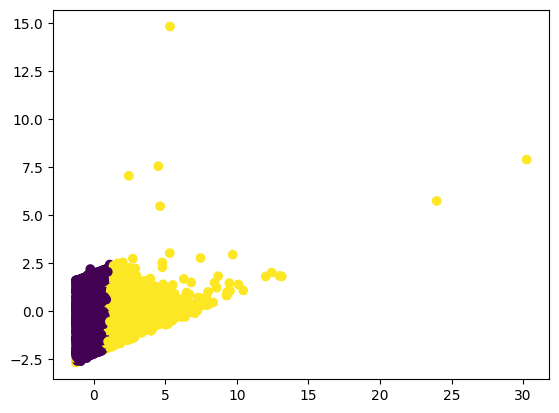

In [8]:
plt.scatter(df[0],df[1],c=prediction_k2)
plt.show() 

In [9]:
k=3

print('\n when k is :',k)
pi,mu,var=EM(df, k, max_iter=300)
print('mu values are:',mu)
print('var is :',var)
print('pi is ',pi)
prediction_k3=predict_clusters(df,pi,mu,var)
sc=silhouette_score(df,prediction_k3)
print('silhietter score is:',sc)
score.append(sc)


 when k is : 3
mu values are: [[-0.38052289  0.26125451]
 [ 2.90535885 -0.11664724]
 [ 0.40361749 -0.51561152]]
var is : [[[0.14316099 0.01654473]
  [0.01654473 0.9112167 ]]

 [[5.81649753 1.30079627]
  [1.30079627 1.35526419]]

 [[0.59913764 0.25420483]
  [0.25420483 0.72898185]]]
pi is  [0.64305094 0.04022187 0.31672719]
silhietter score is: 0.29285793559716905


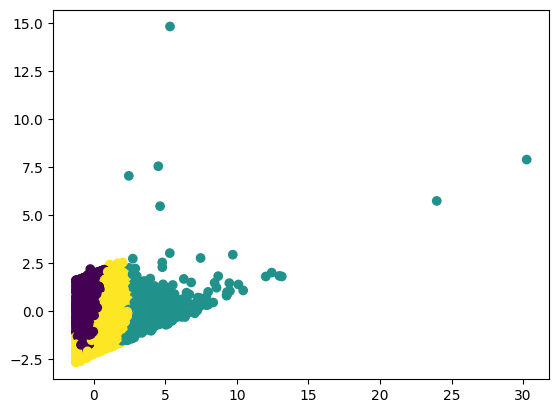

In [10]:
plt.scatter(df[0],df[1],c=prediction_k3)

In [11]:
k=4

print('\n when k is :',k)
pi,mu,var=EM(df, k, max_iter=300)
print('mu values are:',mu)
print('var is :',var)
print('pi is ',pi)
prediction_k4=predict_clusters(df,pi,mu,var)
sc=silhouette_score(df,prediction_k4)
print('silhietter score is:',sc)
score.append(sc)


 when k is : 4
mu values are: [[ 0.97497658 -0.56632771]
 [-0.49431409  0.8014201 ]
 [-0.12720659 -0.39700404]
 [ 3.96506158  0.34856545]]
var is : [[[0.89621939 0.26284208]
  [0.26284208 0.56360012]]

 [[0.09718866 0.02827202]
  [0.02827202 0.4455655 ]]

 [[0.2562541  0.19732603]
  [0.19732603 0.77523122]]

 [[8.44292937 1.38745409]
  [1.38745409 1.96202667]]]
pi is  [0.15872166 0.34187422 0.48039979 0.01900434]
silhietter score is: 0.318839122014816


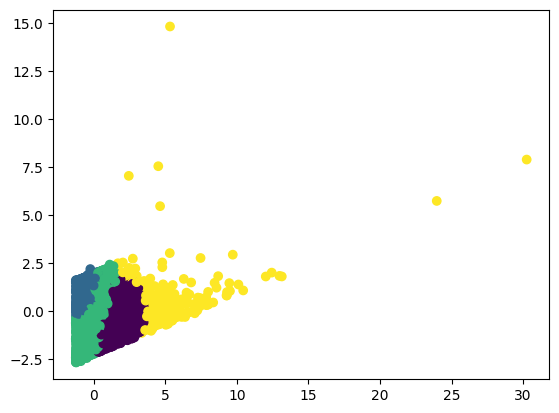

In [12]:
plt.scatter(df[0],df[1],c=prediction_k4)

plt.show()

In [13]:
for i in range(len(k_val)):
  print('when k is ',k_val[i],'score is :',score[i])

when k is  2 score is : 0.45548719509551727
when k is  3 score is : 0.29285793559716905
when k is  4 score is : 0.318839122014816
